In [2]:
"""
! Question 1: Google Playstore Data Analysis and Regression

* This notebook will:
A. Check and handle missing values and duplicates in the googleplaystore_new.csv dataset.
B. Plot the average rating per Category.
C. Create a numeric 'Size in bytes' column from the 'Size' column.
D. Create a numeric 'Numeric_installs' column from the 'Installs' column.
E. Delete specified columns and save the cleaned dataset as Updated_googleplaystore.csv.
F. Using remaining features, find the best regression model to predict 'Rating'.
G. Repeat regression after dropping 'Installs_Num' and 'Size in Bytes' and conclude.
H. Repeat regression using only 'Reviews' and conclude.
I. Analyze effect of different test set sizes (90% to 10%) on model performance and visualize results.
"""

"\n! Question 1: Google Playstore Data Analysis and Regression\n\n* This notebook will:\nA. Check and handle missing values and duplicates in the googleplaystore_new.csv dataset.\nB. Plot the average rating per Category.\nC. Create a numeric 'Size in bytes' column from the 'Size' column.\nD. Create a numeric 'Numeric_installs' column from the 'Installs' column.\nE. Delete specified columns and save the cleaned dataset as Updated_googleplaystore.csv.\nF. Using remaining features, find the best regression model to predict 'Rating'.\nG. Repeat regression after dropping 'Installs_Num' and 'Size in Bytes' and conclude.\nH. Repeat regression using only 'Reviews' and conclude.\nI. Analyze effect of different test set sizes (90% to 10%) on model performance and visualize results.\n"

In [3]:
"""
! Part A: Check and handle missing values and duplicates
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# * Load the dataset
df = pd.read_csv('./res/googleplaystore_new.csv')

# ? Check for missing values & drop rows with any nulls
null_rows = df[df.isnull().any(axis=1)]
print(f"Number of rows with null values: {len(null_rows)}")

df.dropna(inplace=True)

# ? Check for and drop duplicates rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of rows with null values: 82
Number of duplicate rows: 137


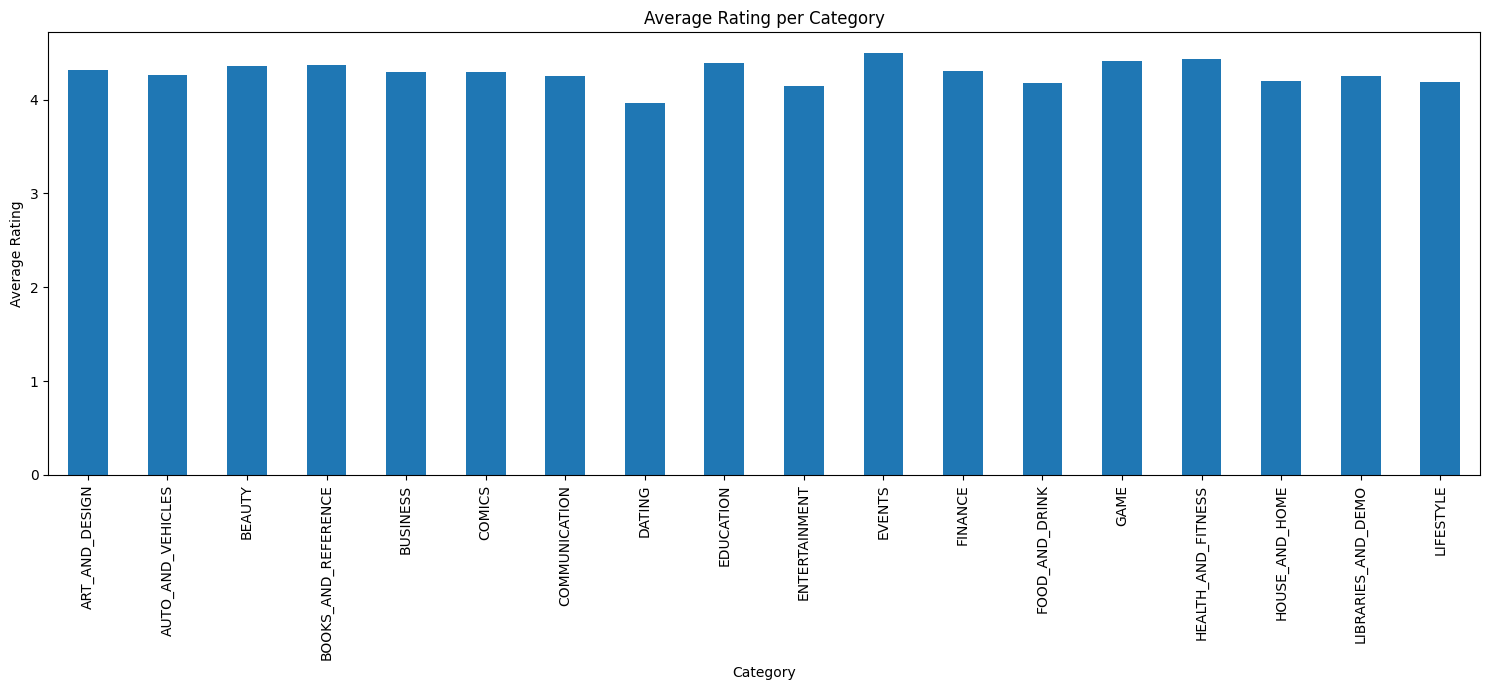

In [4]:
"""
! Part B: Average Parting per Category
"""

# * Group by 'Category' and calculate the mean average rating
avg_rating = df.groupby('Category')['Rating'].mean()

# ? Plot Average Rating per Category
avg_rating.plot(kind='bar', figsize=(15, 7))
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

In [ ]:
"""
! Part C: Create a numeric 'Size in bytes' column from the 'Size' column
"""

# * Function to convert 'Size' to bytes
def size_to_bytes(x):
    if x.endswith('M'):
        return float(x[:-1]) * 1e6
    if x.endswith('k'):
        return float(x[:-1]) * 1e3
    return np.nan

# ? Apply the function to create a new column 'Size_in_bytes'
df['Size_in_bytes'] = df['Size'].apply(size_to_bytes)

In [14]:
"""
! Part D: Create a numeric 'Numeric_installs' column from the 'Installs' column
"""

# * Function to convert 'Installs' to int
def installs_to_int(x):
    return int(x.replace('+', '').replace(',', ''))

df['Numeric_installs'] = df['Installs'].map(installs_to_int)

In [15]:
"""
! Part E: Drop specified columns and save the cleaned dataset as Updated_googleplaystore.csv
"""

# * Drop specified columns
cols_to_drop = ['Type', 'Price', 'Genres', 'Android Ver', 'Size', 'Installs', 'App']
cleaned = df.drop(columns=cols_to_drop)

# ? Save the cleaned dataset
cleaned.to_csv('./res/Updated_googleplaystore.csv', index=False)

print("Cleaned dataset saved as Updated_googleplaystore.csv")

Cleaned dataset saved as Updated_googleplaystore.csv


In [16]:
"""
! Part F: Using remaining features, find the best regression model to predict 'Rating'
"""

# * Define features and target variable
y = cleaned['Rating']
X = cleaned[['Category', 'Reviews', 'Content Rating', 'Size_in_bytes', 'Numeric_installs']]

# * One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# * Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ? Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# ? Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds)
    results[name] = rmse
    print(f"{name} RMSE: {rmse}")
    
print("Model performance (RMSE):", results)
results

Linear Regression RMSE: 0.19951608649973204
Decision Tree RMSE: 0.2337349397590361
Random Forest RMSE: 0.15596716465863456
Model performance (RMSE): {'Linear Regression': 0.19951608649973204, 'Decision Tree': 0.2337349397590361, 'Random Forest': 0.15596716465863456}


{'Linear Regression': 0.19951608649973204,
 'Decision Tree': 0.2337349397590361,
 'Random Forest': 0.15596716465863456}

In [17]:
"""
! Part G: Repeat regression after dropping 'Installs_Num' and 'Size in Bytes'

? What do you conclude?
* - The model performance may vary based on the features used.
* - Dropping 'Installs_Num' and 'Size_in_bytes' may lead to a different RMSE.
* - The model's performance can be affected by the features included.
"""

# * Drop 'Installs_Num' and 'Size_in_bytes'
y = cleaned['Rating']
X2 = cleaned[['Category', 'Reviews', 'Content Rating']]
X2 = pd.get_dummies(X2, drop_first=True)

# * Train-test split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# ? Train and evaluate models
results2 = {}
for name, model in models.items():
    model.fit(X2_train, y_train)
    preds = model.predict(X2_test)
    results2[name] = mean_squared_error(y_test, preds)
    print(f"{name} RMSE after dropping 'Installs_Num' and 'Size_in_bytes': {results2[name]}")

print("Model performance after dropping 'Installs_Num' and 'Size_in_bytes':", results2)
results2

Linear Regression RMSE after dropping 'Installs_Num' and 'Size_in_bytes': 0.1989425899759908
Decision Tree RMSE after dropping 'Installs_Num' and 'Size_in_bytes': 0.24201807228915667
Random Forest RMSE after dropping 'Installs_Num' and 'Size_in_bytes': 0.18393831110447453
Model performance after dropping 'Installs_Num' and 'Size_in_bytes': {'Linear Regression': 0.1989425899759908, 'Decision Tree': 0.24201807228915667, 'Random Forest': 0.18393831110447453}


{'Linear Regression': 0.1989425899759908,
 'Decision Tree': 0.24201807228915667,
 'Random Forest': 0.18393831110447453}

In [18]:
"""
! Part H: Repeat regression using only 'Reviews'

? What do you conclude?
* - The model performance may vary significantly when using only 'Reviews'.
* - The RMSE may be higher compared to using multiple features.
* - The model may be overfitting or underfitting when using only 'Reviews'.
* - The 'Reviews' feature alone may not be sufficient for accurate predictions.
"""

# * Define features and target variable
y = cleaned['Rating']
X3 = cleaned[['Reviews']]

# * Train-test split
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# ? Train and evaluate models
results3 = {}
for name, model in models.items():
    model.fit(X3_train, y_train)
    preds = model.predict(X3_test)
    results3[name] = mean_squared_error(y_test, preds)
    print(f"{name} RMSE using only 'Reviews': {results3[name]}")
    
print("Model performance using only 'Reviews':", results3)
results3

Linear Regression RMSE using only 'Reviews': 0.22239572641367586
Decision Tree RMSE using only 'Reviews': 0.282698572066042
Random Forest RMSE using only 'Reviews': 0.22316918346195988
Model performance using only 'Reviews': {'Linear Regression': 0.22239572641367586, 'Decision Tree': 0.282698572066042, 'Random Forest': 0.22316918346195988}


{'Linear Regression': 0.22239572641367586,
 'Decision Tree': 0.282698572066042,
 'Random Forest': 0.22316918346195988}

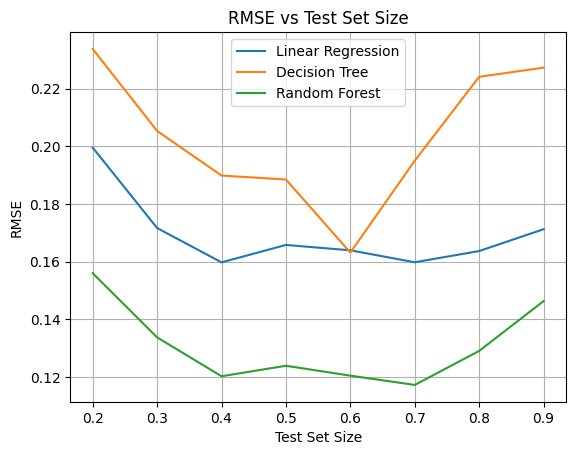

In [19]:
"""
! Part I: Effect of Test Set Size on Performance

? How would you interpret this?
* - The RMSE may vary with different test set sizes.
* - The model's performance may be overestimated or underestimated depending on the test set size.
* - The model's performance may be more stable with larger test set sizes.
* - Smaller test set sizes may lead to higher variance in RMSE.
"""

# * Define a range of test sizes between 0.9 to 0.1
sizes = np.arange(0.9, 0.1, -0.1)
rmse_scores = { name: [] for name in models }

# ? Train and evaluate models for different test sizes
for ts in sizes:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=ts, random_state=42)
    for name, model in models.items():
        model.fit(X_tr, y_tr)
        preds = model.predict(X_te)
        rmse_scores[name].append(mean_squared_error(y_te, preds))
        
# ? Plot RMSE scores
for name, scores in rmse_scores.items():
    plt.plot(sizes, scores, label=name)
    
plt.title('RMSE vs Test Set Size')
plt.xlabel('Test Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()